<a href="https://colab.research.google.com/github/snow-white2024/AIFFEL_quest_cr/blob/master/MLOps_%EA%B8%B0%EC%B4%88%5B%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. 모델 고정해서 사용하기

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, BatchNormalization, Flatten, Dense, Dropout

# Create the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    AveragePooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    AveragePooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 15, 15, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 6, 6, 64)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 6, 6, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 612,426 (2.34 MB)

 Trainable params: 612,234 (2.34 MB)

 Non-trainable params: 192 (768.00 B)

# 1. Data Centric AI 맛보기

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


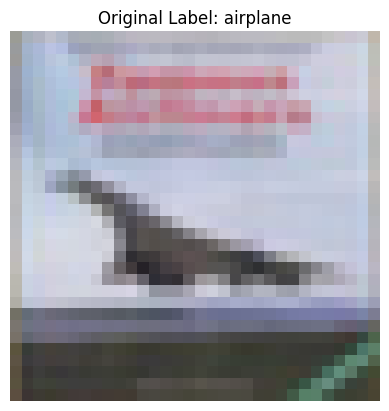

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# CIFAR-10 데이터 로드
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# CIFAR-10 클래스 이름
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 특정 ID의 이미지를 시각화
def visualize_image(image_id):
    plt.imshow(x_test[image_id])
    plt.title(f"Original Label: {class_names[y_test[image_id][0]]}")
    plt.axis('off')
    plt.show()

# ID로 잘못된 샘플 시각화
image_id = 3  # 예시 ID
visualize_image(image_id)

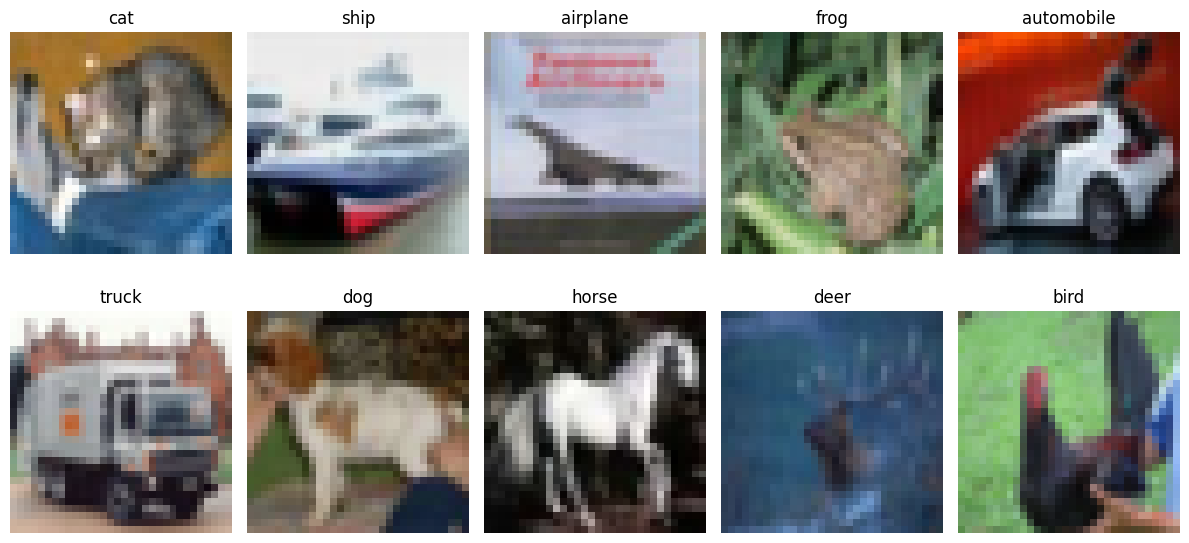

In [3]:
# CIFAR-10 데이터셋의 각 클래스에서 샘플 이미지 시각화
def visualize_all_classes():
    plt.figure(figsize=(12, 6))  # 전체 이미지 크기 설정
    unique_classes = set()  # 각 클래스를 추적할 집합

    for i in range(len(x_test)):
        label = y_test[i][0]
        if label not in unique_classes:  # 아직 보지 않은 클래스라면 추가
            unique_classes.add(label)
            plt.subplot(2, 5, len(unique_classes))  # 2x5 배열로 이미지 배치
            plt.imshow(x_test[i])
            plt.title(class_names[label])
            plt.axis('off')

        if len(unique_classes) == 10:  # 모든 클래스가 포함되면 중단
            break

    plt.tight_layout()
    plt.show()

# 모든 클래스의 샘플 이미지 시각화
visualize_all_classes()

In [4]:
# 레이블 수정 함수
def correct_label(image_id):
    print(f"Original Label: {class_names[y_test[image_id][0]]}")
    plt.imshow(x_test[image_id])
    plt.title("Image to Correct")
    plt.axis('off')
    plt.show()

    # 사용자로부터 새로운 레이블 입력받기
    print("Enter the correct label (choose one from the following):")
    for i, class_name in enumerate(class_names):
        print(f"{i}: {class_name}")

    corrected_label = int(input("Correct Label ID: "))
    if 0 <= corrected_label < len(class_names):
        y_test[image_id][0] = corrected_label
        print(f"Label corrected to: {class_names[corrected_label]}")
    else:
        print("Invalid label ID. No changes made.")

Original Label: cat


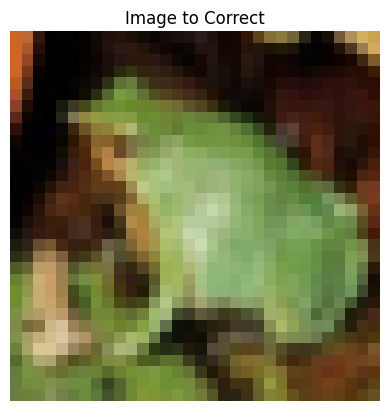

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 6
Label corrected to: frog


In [5]:
# 잘못된 레이블 확인 및 수정
image_id = 2405
correct_label(image_id)

In [6]:
# 수정된 레이블 확인
print(f"Updated Label for Image ID {image_id}: {class_names[y_test[image_id][0]]}")

Updated Label for Image ID 2405: frog


Original Label: airplane


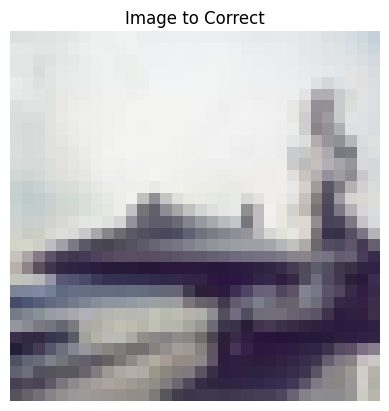

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 0
Label corrected to: airplane
Original Label: deer


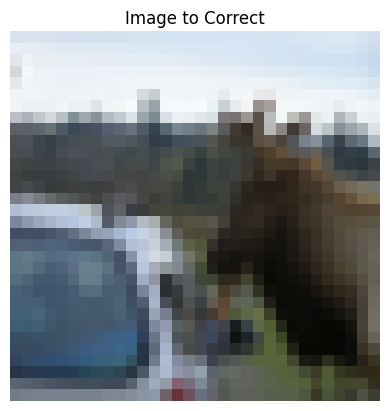

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 7
Label corrected to: horse
Original Label: airplane


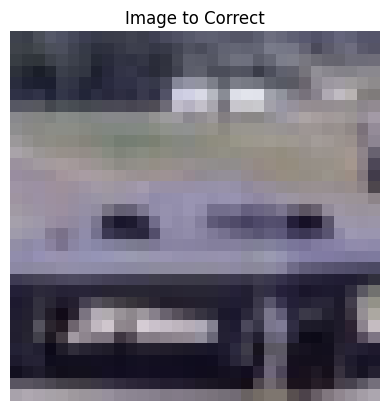

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 0
Label corrected to: airplane


In [7]:
# 여러 이미지 레이블 확인 및 수정
image_ids_to_check = [6877, 8058, 2532]  # 확인할 이미지 ID 리스트
for img_id in image_ids_to_check:
    correct_label(img_id)

Original Label: automobile


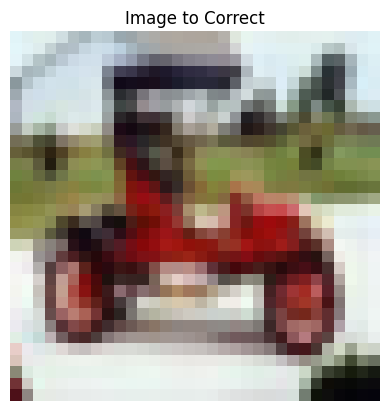

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 9
Label corrected to: truck
Original Label: cat


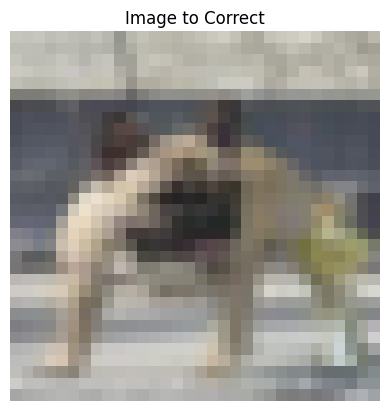

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 5
Label corrected to: dog
Original Label: cat


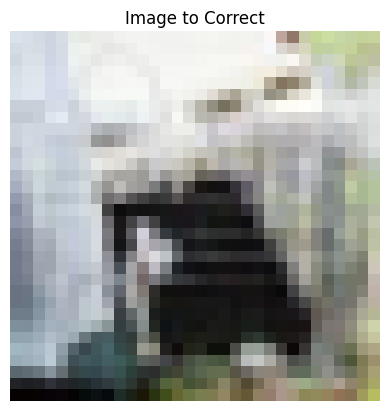

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 9
Label corrected to: truck


In [8]:
# 여러 이미지 레이블 확인 및 수정
image_ids_to_check = [1969, 2804, 6792]  # 확인할 이미지 ID 리스트
for img_id in image_ids_to_check:
    correct_label(img_id)

Original Label: cat


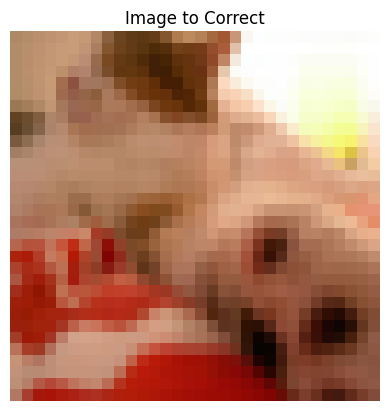

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 5
Label corrected to: dog
Original Label: cat


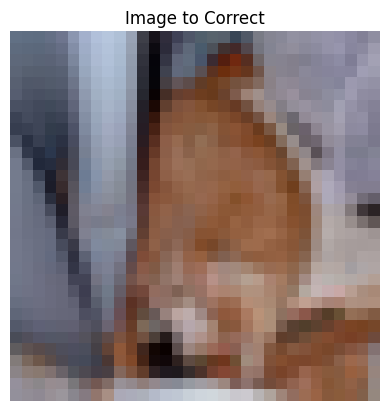

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 5
Label corrected to: dog
Original Label: horse


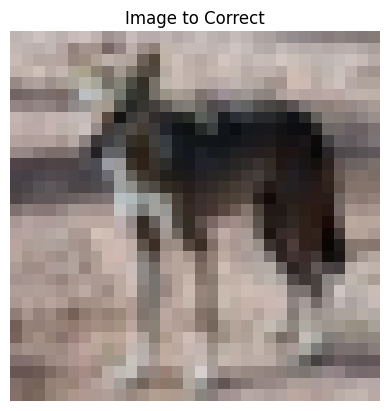

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 4
Label corrected to: deer


In [9]:
# 여러 이미지 레이블 확인 및 수정
image_ids_to_check = [1227, 5191, 5690]  # 확인할 이미지 ID 리스트
for img_id in image_ids_to_check:
    correct_label(img_id)

Original Label: airplane


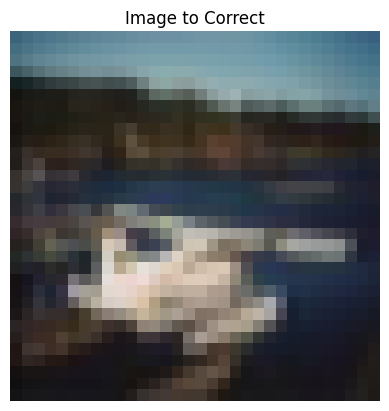

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 0
Label corrected to: airplane
Original Label: bird


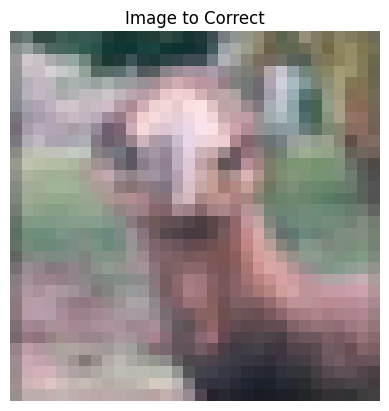

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 4
Label corrected to: deer
Original Label: deer


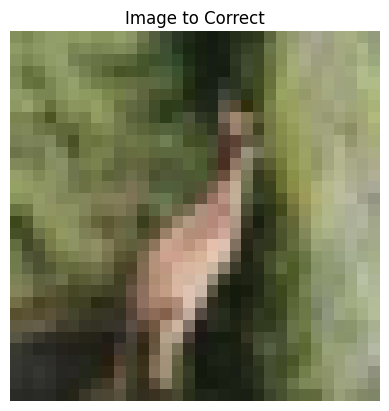

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 4
Label corrected to: deer
Original Label: bird


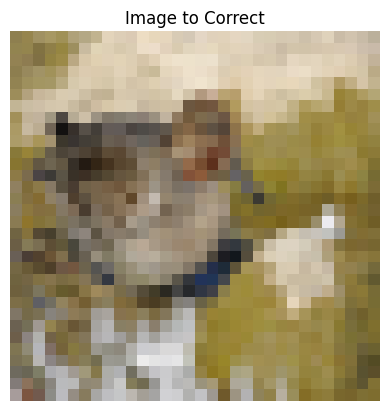

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 2
Label corrected to: bird
Original Label: deer


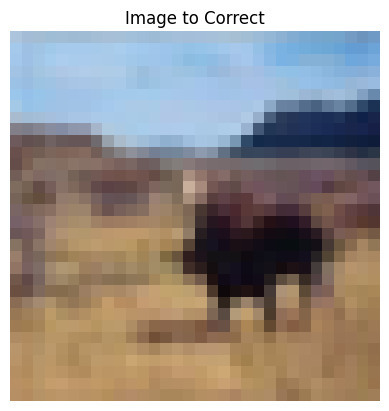

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 2
Label corrected to: bird


In [10]:
# 여러 이미지 레이블 확인 및 수정
image_ids_to_check = [1718, 2592, 4794, 5960, 165]  # 확인할 이미지 ID 리스트
for img_id in image_ids_to_check:
    correct_label(img_id)

Original Label: automobile


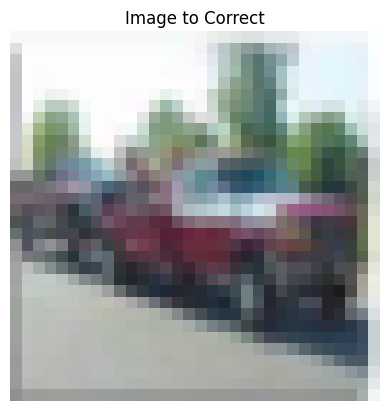

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 9
Label corrected to: truck
Original Label: cat


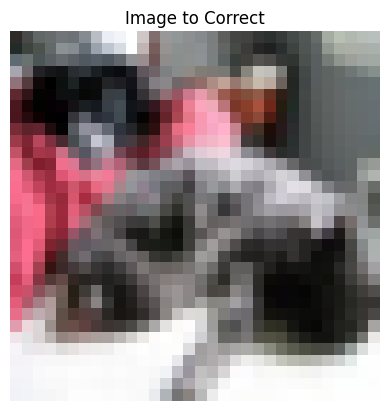

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 5
Label corrected to: dog
Original Label: automobile


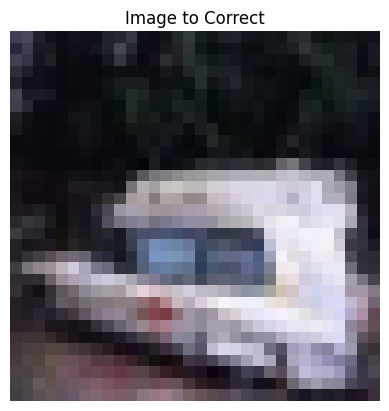

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 1
Label corrected to: automobile
Original Label: frog


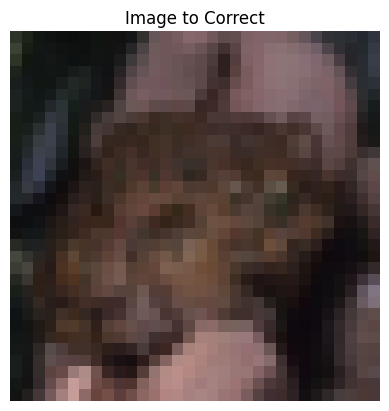

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 6
Label corrected to: frog
Original Label: airplane


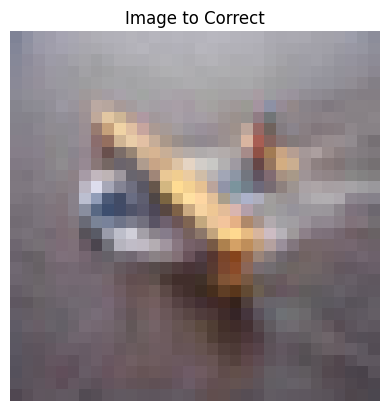

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 0
Label corrected to: airplane
Original Label: dog


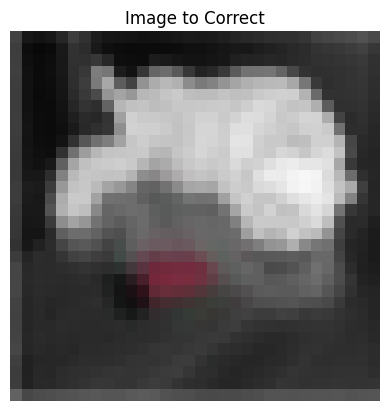

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 3
Label corrected to: cat


In [11]:
# 여러 이미지 레이블 확인 및 수정
image_ids_to_check = [9227, 5632, 9352, 7846, 6966, 5468]  # 확인할 이미지 ID 리스트
for img_id in image_ids_to_check:
    correct_label(img_id)

# 2. 하이퍼파라미터 튜닝

In [12]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.2 MB/s eta 0:00:00


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from kerastuner.tuners import Hyperband
from tensorflow.keras.datasets import cifar10

# 데이터 로드 및 전처리
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # 정규화
y_train, y_test = to_categorical(y_train), to_categorical(y_test)  # One-hot encoding

# 모델 생성 함수
def build_model(hp):
    model = Sequential()

    # 첫 번째 Conv2D 레이어
    model.add(Conv2D(
        filters=hp.Int('conv1_filters', min_value=16, max_value=64, step=16),
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(32, 32, 3)
    ))
    model.add(AveragePooling2D((2, 2)))
    model.add(BatchNormalization())

    # 두 번째 Conv2D 레이어
    model.add(Conv2D(
        filters=hp.Int('conv2_filters', min_value=32, max_value=128, step=32),
        kernel_size=(3, 3),
        activation='relu'
    ))
    model.add(AveragePooling2D((2, 2)))
    model.add(BatchNormalization())

    model.add(Flatten())

    # Dense 레이어
    model.add(Dense(
        units=hp.Int('dense_units', min_value=128, max_value=512, step=128),
        activation='relu'
    ))
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(10, activation='softmax'))

    # 모델 컴파일
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Hyperband 튜너 생성
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='cifar10_tuning',
    project_name='cifar10_hyperband'
)

# 콜백 설정
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# 튜닝 시작
tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[stop_early])

# 최적의 하이퍼파라미터 출력
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The optimal number of filters in the first Conv2D layer is {best_hps.get('conv1_filters')},
the optimal number of filters in the second Conv2D layer is {best_hps.get('conv2_filters')},
the optimal number of units in the Dense layer is {best_hps.get('dense_units')},
the optimal dropout rate is {best_hps.get('dropout_rate')},
and the optimal learning rate is {best_hps.get('learning_rate')}.
""")

# 최적의 하이퍼파라미터로 학습
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# 모델 저장
best_model.save('saved_model/cifar10_model.h5')

Trial 30 Complete [00h 01m 35s]
val_accuracy: 0.7009000182151794

Best val_accuracy So Far: 0.7497000098228455
Total elapsed time: 00h 23m 44s

The optimal number of filters in the first Conv2D layer is 48,
the optimal number of filters in the second Conv2D layer is 64,
the optimal number of units in the Dense layer is 384,
the optimal dropout rate is 0.30000000000000004,
and the optimal learning rate is 0.000201508126711304.

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.4147 - loss: 1.7775 - val_accuracy: 0.5093 - val_loss: 1.5114
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6128 - loss: 1.1107 - val_accuracy: 0.6402 - val_loss: 1.0198
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6863 - loss: 0.8929 - val_accuracy: 0.6847 - val_loss: 0.8970
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7379 - loss: 0.7457 - val_accuracy: 0.6606 - val_loss: 0.9859
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 

# 🔍 학습 결과 분석

📈 학습 과정 분석

1.초기 성능:

첫 번째 epoch에서 accuracy: 41.47%, val_accuracy: 50.93%로 시작.
초반부터 과적합 없이 비교적 안정적인 학습 진행.

2.성능 향상:

Epoch 1~6: 빠르게 향상 (accuracy 41.47% → 81.51%, val_accuracy 50.93% → 70.37%).
Epoch 7~12: 점진적으로 증가 (val_accuracy 71.90% → 최고치 73.35%).

3.과적합 발생:

Epoch 13 이후부터 train_accuracy는 계속 증가하나, val_accuracy는 정체되거나 하락 (73.35% → 71.81%).
val_loss가 1.0을 넘어서면서 과적합이 진행됨.

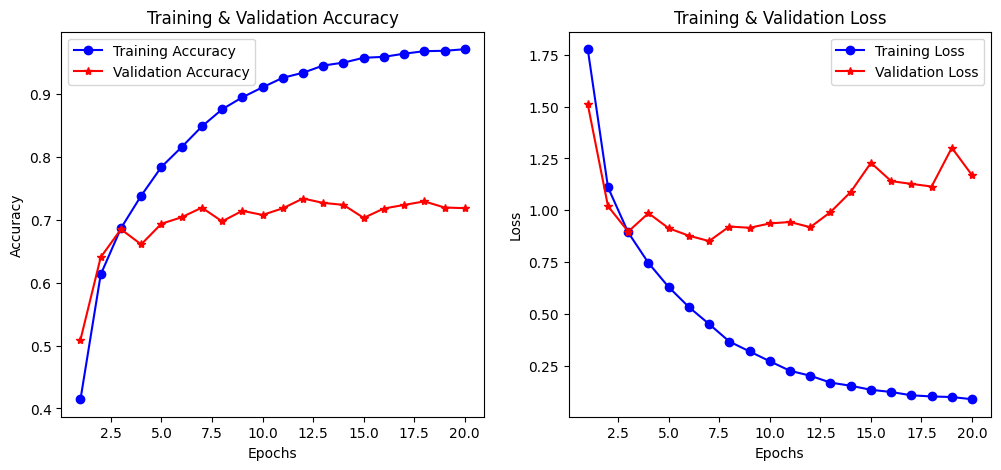

In [14]:
import matplotlib.pyplot as plt

# 학습 과정에서 저장된 값들
train_acc = [0.4147, 0.6128, 0.6863, 0.7379, 0.7836, 0.8151, 0.8479, 0.8751, 0.8942, 0.9101,
             0.9252, 0.9332, 0.9447, 0.9493, 0.9570, 0.9585, 0.9635, 0.9675, 0.9681, 0.9706]
val_acc = [0.5093, 0.6402, 0.6847, 0.6606, 0.6934, 0.7037, 0.7190, 0.6972, 0.7139, 0.7074,
           0.7179, 0.7335, 0.7265, 0.7234, 0.7027, 0.7176, 0.7233, 0.7289, 0.7192, 0.7181]

train_loss = [1.7775, 1.1107, 0.8929, 0.7457, 0.6293, 0.5327, 0.4508, 0.3664, 0.3187, 0.2712,
              0.2252, 0.2014, 0.1682, 0.1529, 0.1335, 0.1228, 0.1069, 0.1012, 0.0985, 0.0879]
val_loss = [1.5114, 1.0198, 0.8970, 0.9859, 0.9134, 0.8772, 0.8513, 0.9217, 0.9155, 0.9365,
            0.9434, 0.9183, 0.9912, 1.0883, 1.2292, 1.1407, 1.1274, 1.1148, 1.3017, 1.1692]

epochs = range(1, 21)

plt.figure(figsize=(12, 5))

# Accuracy 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# 문제점 및 개선 방안
1.과적합 방지 필요

L2 정규화 (Weight Decay) 적용 고려.
데이터 증강 (Augmentation) 활용: 랜덤 크롭, 회전, 밝기 변화 등 추가.
드롭아웃 비율 증가 (예: 0.3 → 0.4~0.5) 고려.

2.조기 종료 (Early Stopping)

13~14 epoch 이후 성능이 정체되므로, 최적 epoch에서 학습을 멈추는 EarlyStopping 적용 추천.

3.학습률 조정

현재 학습률 0.0002015에서 조금 더 낮춰서 미세 조정 (예: 0.0001)하면 안정적인 학습 가능.